In [115]:
## Feature_engineering

In [116]:
import pandas as pd
flats_df=pd.read_csv("flats_cleaned.csv")
#pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
flats_df.head()

,property_name,Property_type,property_type,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,value,currency,floor_Num,total_floors
0,2 BHK Flat in Krishna Colony,flat,2 BHK,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",45.00,Lac,4.0,4.0
1,2 BHK Flat in Ashok Vihar,flat,2 BHK,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",50.00,Lac,1.0,3.0
2,2 BHK Flat in Sohna,flat,2 BHK,tulsiani easy in homes,0.40,6722.0,Carpet area: 595 (55.28 sq.m.),2,2,3,not available,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",40.00,Lac,12.0,14.0
3,2 BHK Flat in Sector 61 Gurgaon,flat,2 BHK,smart world orchard,1.47,12250.0,Carpet area: 1200 (111.48 sq.m.),2,2,2,study room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,1.47,Crore,2.0,4.0
4,2 BHK Flat in Sector 92 Gurgaon,flat,2 BHK,parkwood westend,0.70,5204.0,Super Built up area 1345(124.95 sq.m.),2,2,3,study room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",70.00,Lac,5.0,8.0


#### Feature engineering
##### plan of action
##### Focus is on ->>> areaWithType,additionalRoom,agePossession,furnishDetails ,Features columns .



In [117]:
flats_df['area']=round(flats_df['price']*10000000/flats_df['price_per_sqft'])
flats_df.head(5)[['price','areaWithType','area']]


,price,areaWithType,area
0,0.45,Carpet area: 900 (83.61 sq.m.),900.0
1,0.50,Carpet area: 650 (60.39 sq.m.),650.0
2,0.40,Carpet area: 595 (55.28 sq.m.),595.0
3,1.47,Carpet area: 1200 (111.48 sq.m.),1200.0
4,0.70,Super Built up area 1345(124.95 sq.m.),1345.0



##### types of area (Business knowledge )
#####-> Super built area
#####-> Built up area:carpet area + thickness of wall + balcony
#####-> carpet area built up area + any additional common area

In [118]:
import re
def get_super_built_up_area(txt):
  k=re.search(r'Super Built up area (\d+\.?\d*)',txt)
  if k:
    return(float(k.group(1)))
  return None
def get_carpet_area(txt):
  k=re.search(r'Carpet area: (\d+\.?\d*)',txt)
  if k:
    return(float(k.group(1)))
  return None
def get_built_up_area(txt):
  k=re.search(r'Built Up area: (\d+\.?\d*)',txt)
  if k:
    return(float(k.group(1)))
  return None

flats_df['super_built_up_area']=flats_df['areaWithType'].apply(get_super_built_up_area)
flats_df['carpet_area']=flats_df['areaWithType'].apply(get_carpet_area)
flats_df['Built_up_area']=flats_df['areaWithType'].apply(get_built_up_area)
flats_df[['areaWithType','price_per_sqft','area','super_built_up_area','carpet_area','Built_up_area']].head()



,areaWithType,price_per_sqft,area,super_built_up_area,carpet_area,Built_up_area
0,Carpet area: 900 (83.61 sq.m.),5000.0,900.0,NaN,900.0,NaN
1,Carpet area: 650 (60.39 sq.m.),7692.0,650.0,NaN,650.0,NaN
2,Carpet area: 595 (55.28 sq.m.),6722.0,595.0,NaN,595.0,NaN
3,Carpet area: 1200 (111.48 sq.m.),12250.0,1200.0,NaN,1200.0,NaN
4,Super Built up area 1345(124.95 sq.m.),5204.0,1345.0,1345.0,NaN,NaN


In [119]:
## this function checks if area is provided in sqft or sqm and converts to a standard of sqft
import re
def convert_to_sqft(text,area_value):
  if area_value is None:
    return None
  match=re.search(r'{} \((\d+\.?\d) sq.m.\)'.format(area_value),text)
  if match :
    sq_m_value=float(match.group(1))
    print(sq_m_value)
    return sq_m_value*10.7639
  return area_value



In [120]:
flats_df['Built_up_area']=flats_df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['Built_up_area']),axis=1)
flats_df['super_built_up_area']=flats_df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']),axis=1)
flats_df['carpet_area']=flats_df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['carpet_area']),axis=1)
flats_df[['areaWithType','carpet_area','super_built_up_area','Built_up_area']].head()


116.1
50.5
31.3
42.9
47.9
31.6
50.5
31.6
50.5
42.5


,areaWithType,carpet_area,super_built_up_area,Built_up_area
0,Carpet area: 900 (83.61 sq.m.),900.0,NaN,NaN
1,Carpet area: 650 (60.39 sq.m.),650.0,NaN,NaN
2,Carpet area: 595 (55.28 sq.m.),595.0,NaN,NaN
3,Carpet area: 1200 (111.48 sq.m.),1200.0,NaN,NaN
4,Super Built up area 1345(124.95 sq.m.),NaN,1345.0,NaN


#### incorporate independent houses

#### 2. Additional Rooms


In [121]:
#additional rooms
flats_df['additionalRoom'].unique()
new_cols=['study room','servant room','store room','pooja room','others']
for col in new_cols:
  flats_df[col]=flats_df['additionalRoom'].str.contains(col).astype(int)


In [122]:
flats_df.sample(5)[['additionalRoom','study room','servant room','store room','pooja room','others']]
flats_df.head(2)

,property_name,Property_type,property_type,society,price,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,value,currency,floor_Num,total_floors,area,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others
0,2 BHK Flat in Krishna Colony,flat,2 BHK,maa bhagwati residency,0.45,5000.0,Carpet area: 900 (83.61 sq.m.),2,2,1,not available,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",45.0,Lac,4.0,4.0,900.0,NaN,900.0,NaN,0,0,0,0,0
1,2 BHK Flat in Ashok Vihar,flat,2 BHK,apna enclave,0.50,7692.0,Carpet area: 650 (60.39 sq.m.),2,2,1,not available,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",50.0,Lac,1.0,3.0,650.0,NaN,650.0,NaN,0,0,0,0,0


##### 3.Age Posession

In [123]:
def age_possesion(value):
  if pd.isna(value):
    return "undefined"
  if "0 to 1 Year Old" in value or "within 6 months" in value or "within 3 months" in value:
    return "New Property"
  if "1 to 5 Year Old" in value:
    return "Relatively New"
  if "5 to 10 Year Old" in value:
    return "Moderately Old"
  if "10+ Year Old" in value:
    return "Old Property"
  if "Under Construction" in value or "By" in value:
    return "Under Construction"
  try:
    int(value.split("")[-1])
    return "Under Construction"
  except:
    return "undefined"
flats_df['agePossession']=flats_df['agePossession'].apply(age_possesion)


#### 4.Furnished Details

In [124]:
flats_df['furnishDetails'].sample(5)

1884    ['1 Water Purifier', '1 Exhaust Fan', '1 Light...
2362                                                  NaN
1911    ['1 Water Purifier', '7 Fan', '1 Exhaust Fan',...
2251                                                  NaN
15      ['1 Light', 'No AC', 'No Bed', 'No Chimney', '...
Name: furnishDetails, dtype: object

In [125]:



#### K means clustering
## Since there are many types of furnishinh we need to create a class of limited categpories which can be created
## using k means clusering
### putting 3 categories furnished semi furnished

# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in flats_df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))
unique_furnishings
# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0
# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    flats_df[furnishing] = flats_df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = flats_df[['furnishDetails'] + columns_to_include]
furnishings_df.head()

,furnishDetails,Bed,Light,Chimney,Exhaust Fan,Fan,TV,Dining Table,Microwave,Wardrobe,Sofa,Modular Kitchen,Stove,Washing Machine,AC,Curtains,Water Purifier,Geyser,Fridge
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...",0,4,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...",0,3,1,1,4,0,0,0,3,0,1,0,0,0,1,0,1,0
2,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\rutur\AppData\Local\Temp\ipykernel_12832\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [127]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [128]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(furnishings_df)
furnishing_reduced=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    furnishing_reduced.append(kmeans.inertia_)


d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

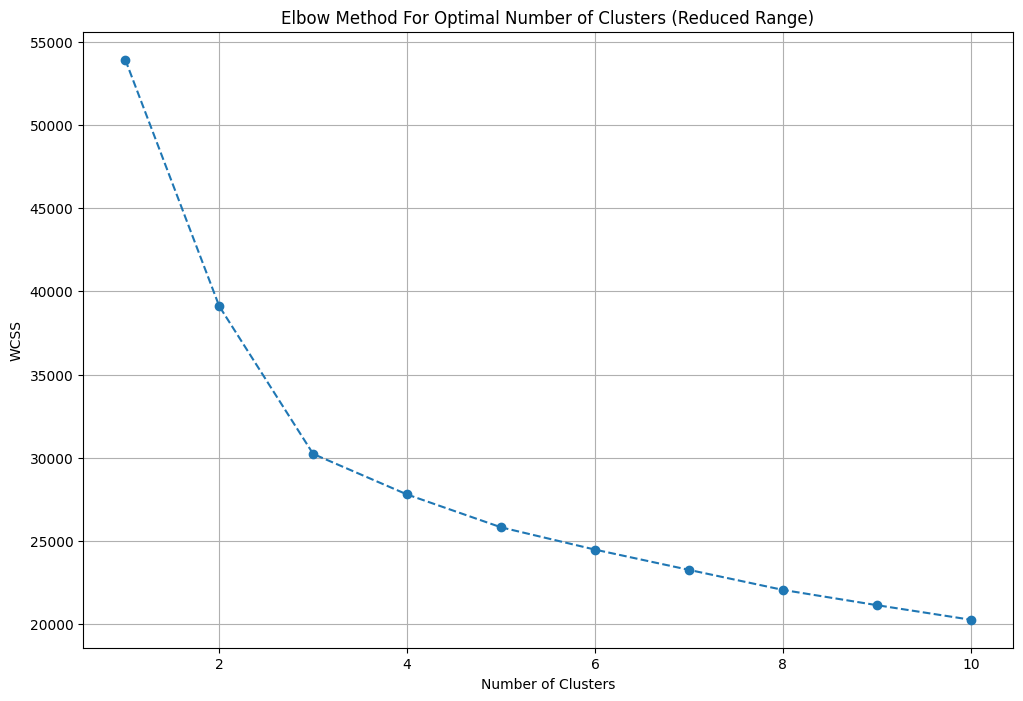

In [129]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), furnishing_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [130]:
#### graph suggests k=3 or 3 categories required hence the three categories are furnished ,semifurnished,unfurnished


In [131]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)
flats_df['furnishing_type']=cluster_assignments
flats_df[['furnishing_type','furnishDetails']]


d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,furnishing_type,furnishDetails
0,0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N..."
1,1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge..."
2,0,NaN
3,0,NaN
4,0,[]
5,0,NaN
6,0,[]
7,0,[]
8,0,NaN
9,0,NaN


##### 5 .Features

In [132]:
flats_df[['society','features']].sample(5)

,society,features
301,maruti vihar,"['Security / Fire Alarm', 'Private Garden / Te..."
1860,the close north,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
2628,ramsons kshitij,NaN
1547,vatika gurgaon,"['Feng Shui / Vaastu Compliant', 'Lift(s)', 'H..."
2976,uphar lakshya homes,"['Lift(s)', 'Visitor Parking']"


In [133]:
flats_df['features'].isnull().sum()

407

In [134]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)
app_df['PropertyName'] = app_df['PropertyName'].str.lower()
temp_df=flats_df[flats_df['features'].isnull()]
x=temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']
flats_df.loc[temp_df.index,'features']=x.values


In [135]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
flats_df['features_list'] = flats_df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(flats_df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
features_binary_df.shape

(2996, 128)

d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\projects\real estate\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

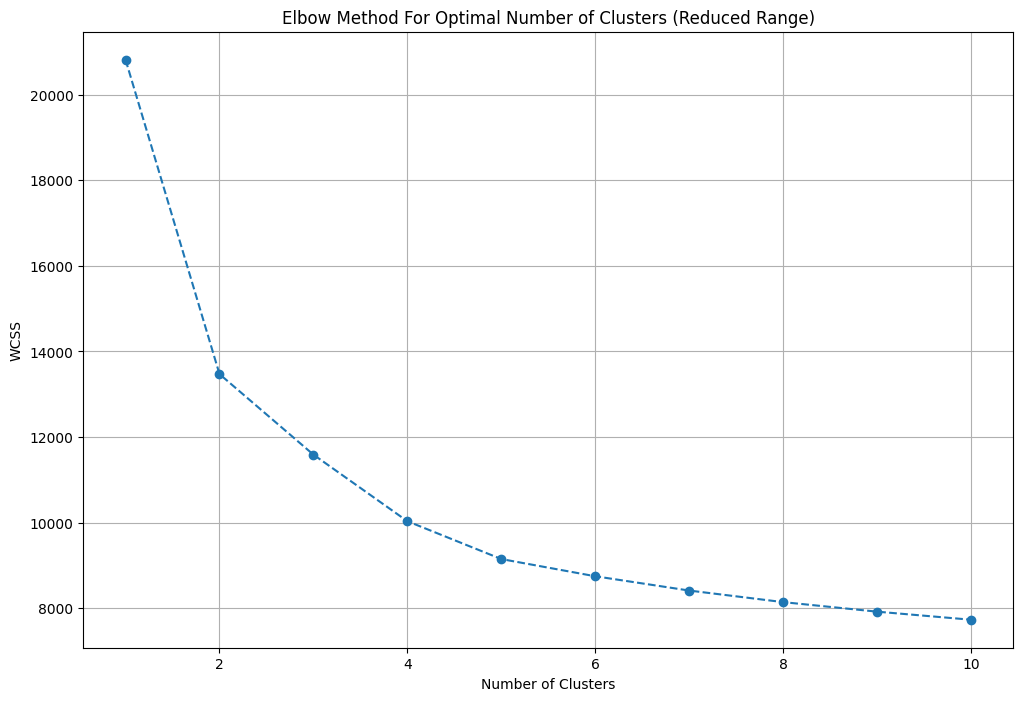

In [137]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [138]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7,


}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)
flats_df['luxury_score']=luxury_score
flats_df.head(3)
features_binary_df['luxuryscore']=luxury_score
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area,luxuryscore
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,28
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,37
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,76
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [139]:
flats_df.shape

(2996, 54)

In [140]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
flats_df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [141]:
flats_df.shape
flats_df.to_csv("flats_Ver2.csv")

In [143]:
import pandas as pd
import re


flats_df['rating'] = flats_df['rating'].astype(str).str.replace(",", "").str.replace("'", "")

pattern = re.compile(r'(\w+)\s*([\d.]+)\s*out of\s*5')

def extract_ratings(text, pattern):
    dict={}
    matches = pattern.findall(text)
    if matches:
        for match in matches:
            #print(f"{match[0]} {match[1]}")
            dict[match[0]]=match[1]
    return(dict)        

c=flats_df['rating'].apply(lambda x: extract_ratings(x, pattern))
ratings_df = pd.json_normalize(list(c))
data=ratings_df.copy()
def change_values(data,temp):
    amenties4_df=data[data[temp]==".5"][temp].replace(".5","4.5")
    return(amenties4_df.index)





list_with_4=['Amenities4','Environment4','Safety4','Lifestyle4','Connectivity4','Management4','Area4','Construction4']
list_with_3=['Amenities3','Environment3','Safety3','Lifestyle3','Connectivity3','Management3','Area3','Construction3']
list_with_2=['Connectivity2']

for temp in list_with_2 :
    a=change_values(data,temp)
    data.loc[a,temp]="2.5"

for temp in list_with_4 :
    a=change_values(data,temp)
    data.loc[a,temp]="4.5"

for temp in list_with_3 :
    a=change_values(data,temp)
    data.loc[a,temp]="3.5"

temp_list=['Amenities','Environment','Safety','Lifestyle','Connectivity','Management','Area','Construction']
t=data.copy()
for i,j in zip(temp_list,list_with_2):
    t[i].fillna(t[j],inplace=True)
for i,j in zip(temp_list,list_with_4):
    t[i].fillna(t[j],inplace=True)
for i,j in zip(temp_list,list_with_3):
    t[i].fillna(t[j],inplace=True)
#data['Environment'].fillna(data['Environment4'],inplace=True)
#data['Amenities'].fillna(data['Amenities4'],inplace=True)
#data['Safety'].fillna(data['Safety4'],inplace=True)
#data['Lifestyle'].fillna(data['Lifestyle4'],inplace=True)
#data['Connectivity'].fillna(data['Connectivity4'],inplace=True)
#data['Management'].fillna(data['Management4'],inplace=True)
#data['Area'].fillna(data['Area4'],inplace=True)
#data['Construction'].fillna(data['Construction4'],inplace=True)
#data
t.drop(columns=list_with_4,inplace=True)
t.drop(columns=list_with_3,inplace=True)
t.drop(columns=list_with_2,inplace=True)
t.loc[59:78]
t.rename(columns={'Area':'Green_area'},inplace=True)
t.loc[59:78]
### t is a dataframe that has converted rating column of main dataframe to columns that can be used for machine learning 


,Environment,Safety,Lifestyle,Connectivity,Green_area,Management,Construction,Amenities
59,4,4,4,5,NaN,NaN,NaN,NaN
60,5,3,4,4,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,4.5,5,4,5,4.5
62,4,4,4,4,NaN,NaN,NaN,NaN
63,5,5,4,4,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,4.5,5,4.5,5,4.5
65,NaN,NaN,NaN,5,5,5,4,5
66,4.5,4.5,4,4.5,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,5,4,3.5,4,4
68,4,4.5,4.5,4,NaN,NaN,NaN,NaN
